In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('USA_Housing.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79249,6,7,3,40173,1505891
1,61287,6,9,5,36882,1058988
2,63345,7,6,3,34310,1260617
3,59982,5,8,4,26354,630943
4,80176,5,6,4,26748,1068138


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Avg. Area Income              497 non-null    int64
 1   Avg. Area House Age           497 non-null    int64
 2   Avg. Area Number of Rooms     497 non-null    int64
 3   Avg. Area Number of Bedrooms  497 non-null    int64
 4   Area Population               497 non-null    int64
 5   Price                         497 non-null    int64
dtypes: int64(6)
memory usage: 23.4 KB


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02
mean,68111.404427,6.030181,6.961771,3.744467,35755.629779,1.226608e+06
std,10357.541635,1.043941,1.076016,1.216940,9901.851489,3.473332e+05
min,17797.000000,4.000000,3.000000,2.000000,173.000000,1.520720e+05
25%,61053.000000,5.000000,6.000000,3.000000,29424.000000,1.010814e+06
50%,68495.000000,6.000000,7.000000,4.000000,35800.000000,1.228811e+06
75%,75180.000000,7.000000,8.000000,4.000000,42249.000000,1.451740e+06
max,97112.000000,9.000000,10.000000,6.000000,69575.000000,2.469066e+06


In [6]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [7]:

data = pd.read_csv('USA_Housing.csv')

float_cols = data.select_dtypes(include='float').columns

data[float_cols] = data[float_cols].round().astype('Int64')

data.to_csv('USA_Housing.csv', index=False)

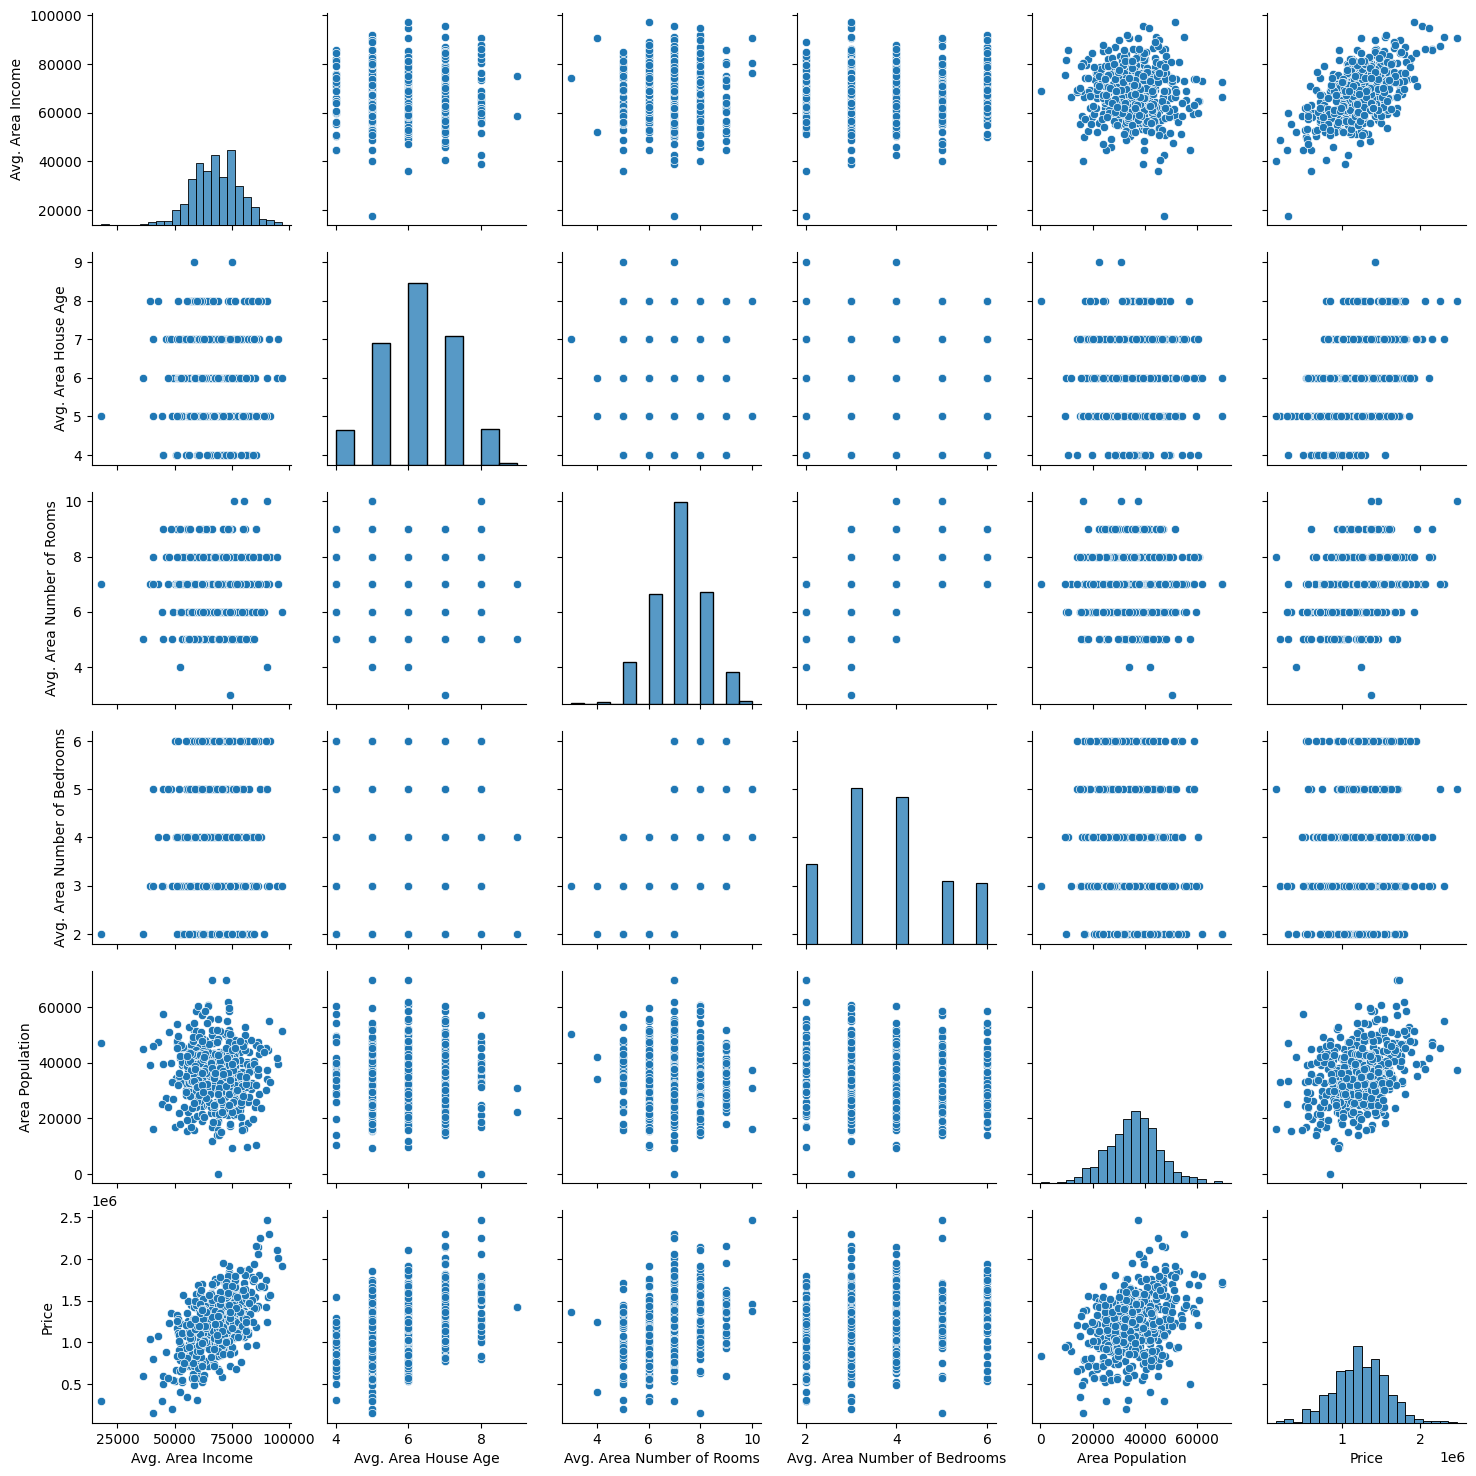

In [8]:
sns.pairplot(data)

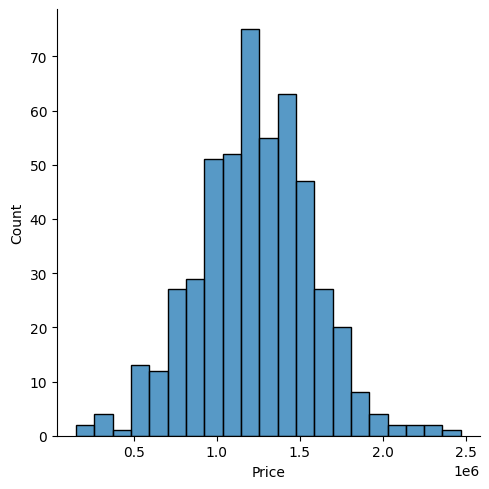

In [9]:
sns.displot(data['Price'])

<Axes: >

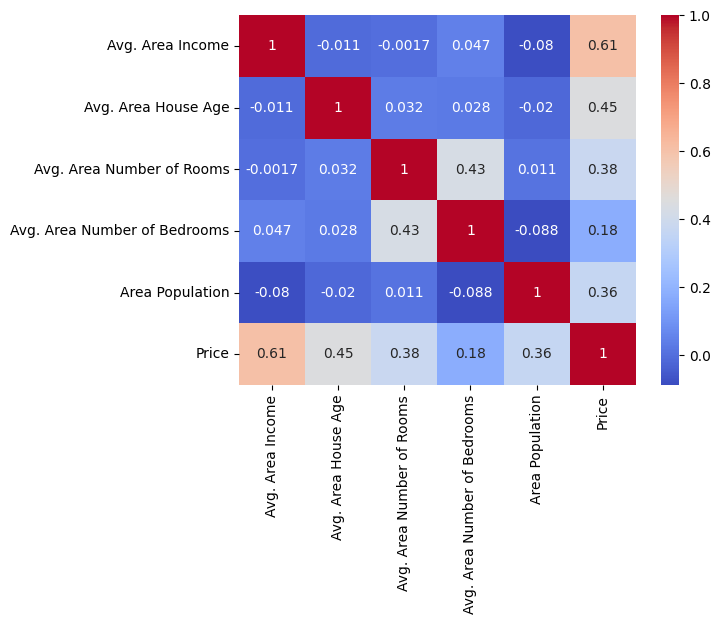

In [10]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

In [11]:

x=data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y =data['Price']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
print(model.intercept_)

-2421000.634483983


In [16]:

coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.733025
Avg. Area House Age,149295.513979
Avg. Area Number of Rooms,108611.421031
Avg. Area Number of Bedrooms,7695.549771
Area Population,13.869495


In [17]:
pred=model.predict(x_test)

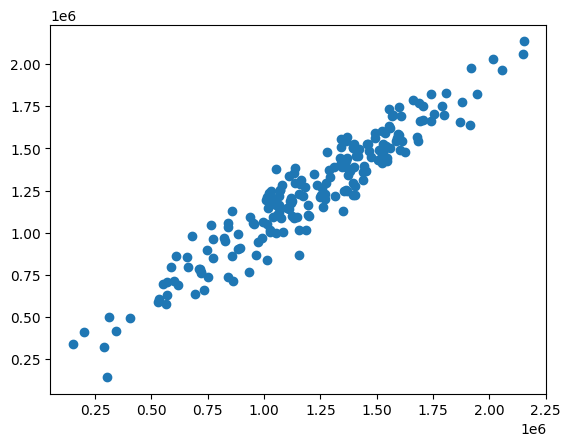

In [18]:
plt.scatter(y_test,pred)

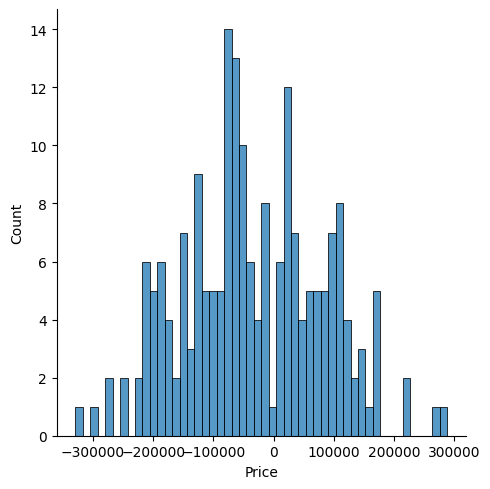

In [19]:
sns.displot((y_test-pred),bins=50);

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 101358.24172975475
MSE: 14962804192.026995
RMSE: 122322.54163492106


In [21]:
model.score(x,y)

0.8812991577994072

In [32]:
import joblib

In [33]:
joblib.dump(model,"HousePricePrediction.joblib")

['HousePricePrediction.joblib']

In [34]:
mj=joblib.load("HousePricePrediction.joblib")

In [35]:
new_data = pd.DataFrame([[64491,4,5,4,40359]], columns=["Avg. Area Income","Avg. Area House Age","Avg. Area Number of Rooms","Avg. Area Number of Bedrooms","Area Population"])
mj.predict(new_data)

array([711364.20366233])

In [36]:
mj.intercept_

np.float64(-2421000.634483983)